# Earnings Growth Across Age Groups and Genders in Hong Kong (1985–2024)

**Author:** Chowdhury, Samin Yasir 


This study investigates how **median monthly employment earnings** have evolved in **Hong Kong** from **1985 to 2024**, focusing on variations across **age groups** and **genders**. 

**Research Question:**
> *How has median monthly employment earnings growth in Hong Kong evolved across different age groups and genders from 1985 to 2024?*

**Objectives:**
1. Examine long-term changes in median monthly employment earnings between 1985 and 2024.
2. Compare earnings trajectories among age groups and between males and females.
3. Statistically test whether observed differences are significant.
4. Use regression and time-series analysis to interpret broader economic trends.


Ultimately, the study aims to understand what these shifts imply for **intergenerational** and **gender-based economic inequality**.


---

**Background & Motivation**


Since the 1980s, Hong Kong has transitioned from a **manufacturing-based** economy to a **service-oriented** economy, while also experiencing significant demographic shifts, including an **aging population** and increased **female workforce participation** (Lui, 2021). These changes have reshaped the **labor market**, influencing **earnings, employment opportunities, and economic equity** (Blau & Kahn, 2017).


**Why Study Earnings Trends?**

Studying earnings trends allows us to:
- Understand how **older vs younger workers** have fared over time.
- Evaluate whether **gender pay disparities** have narrowed or widened.
- Explore the implications for **economic equity** and **social mobility**.

Through an examination of data spanning nearly four decades, this analysis provides a comprehensive view of how **social, demographic, and economic changes** have impacted workers across different groups, highlighting the evolving dynamics of Hong Kong's labor market. By employing statistical analysis and hypothesis testing, the study uncovers **critical insights into broader economic trends**, offering a deeper understanding of the forces shaping employment earnings over time - valuable perspectives for policymakers, businesses, and researchers.

---

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math

df = pd.read_csv("earning_datasets.csv")
df.head(280)

,Year,Age group,Median monthly employment earnings of employed persons-Male (1) (2),Median monthly employment earnings of employed persons-Female (1) (2),Median monthly employment earnings of employed persons- Both Sexes (1) (2)
0,1985,15 - 24,"2,000","2,000","2,000"
1,1985,25 - 34,"3,000","2,300","3,000"
2,1985,35 - 44,"3,500","1,800","3,000"
3,1985,45 - 54,"3,000","1,600","2,600"
4,1985,55 - 59,"2,500","1,500","2,200"
...,...,...,...,...,...
275,2024,35 - 44,"29,800","17,800","22,500"
276,2024,45 - 54,"28,000","17,000","21,000"
277,2024,55 - 59,"23,000","16,000","20,000"
278,2024,60 and over,"18,000","13,000","15,300"


Over the decades, Hong Kong's median monthly employment earnings have exhibited significant variations across age groups and genders. The trends in earnings over time can be visualized to better understand these disparities and the persistent gap in earnings between males and females.

# Data Preparation and Cleaning

This dataset contains monthly average employment income by age group and gender from 1985 to 2024. Initial data processing included:

- Imputing missing annual values to ensure complete temporal coverage
- Renaming columns for easier manipulation (“Male,” “Female,” “Both”)
- Converting comma-separated string values to numeric format
- Removing aggregated “15 years and older” age group to focus on specific cohorts
- Transforming data from wide to long format for analysis

The final dataset contains 480 observations across 40 years, 6 age groups, and 2 genders.

## Descriptive Statistics

### Data Structure Summary:
- **40 years** of data (1985-2024)
- **6 age groups**: 15-24, 25-34, 35-44, 45-54, 55-59, 60 and over
- **2 gender categories**: Male and Female

### Descriptive Findings:

**Overall Gender Comparison:**
- **Male average earnings**: HKD 11,658 per month
- **Female average earnings**: HKD 8,196 per month  
- **Gender pay gap**: HKD 3,462 (approximately 30% difference)

The data reveal that, over time, younger workers (ages 15–24) consistently earn less than their older, more experienced counterparts, with the highest earnings typically observed in the 35–44 and 45–54 age brackets. Gender disparities are also prominent, with males earning more than females across most years; however, recent trends indicate a gradual narrowing of this gap. Meanwhile, older workers (60 and over) tend to earn significantly less, underscoring the challenges they face in maintaining competitive earnings later in life.

In [41]:
df['Year'] = df['Year'].ffill()

df = df.rename(columns={
    'Median monthly employment earnings of employed persons-Male (1) (2)': 'Male',
    'Median monthly employment earnings of employed persons-Female (1) (2)': 'Female',
    'Median monthly employment earnings of employed persons- Both Sexes (1) (2)': 'Both'
})

for col in ['Male', 'Female']:
    df[col] = df[col].astype(str).str.replace(',', '', regex=True)
    df[col] = pd.to_numeric(df[col], errors='coerce')

df = df[df['Age group'] != '15 and over']

# Melt into long format
df_long = df.melt(
    id_vars=['Year', 'Age group'],
    value_vars=['Male', 'Female'],
    var_name='Gender',
    value_name='Earnings'
)

print(df_long.head(489))

     Year    Age group  Gender  Earnings
0    1985      15 - 24    Male      2000
1    1985      25 - 34    Male      3000
2    1985      35 - 44    Male      3500
3    1985      45 - 54    Male      3000
4    1985      55 - 59    Male      2500
..    ...          ...     ...       ...
475  2024      25 - 34  Female     20000
476  2024      35 - 44  Female     17800
477  2024      45 - 54  Female     17000
478  2024      55 - 59  Female     16000
479  2024  60 and over  Female     13000

[480 rows x 4 columns]


In [42]:
# Number of unique years, age groups, and genders
n_years = df_long['Year'].nunique()
n_age_groups = df_long['Age group'].nunique()
n_genders = df_long['Gender'].nunique()

unique_summary = {
    "Unique Years": n_years,
    "Unique Age Groups": n_age_groups,
    "Unique Genders": n_genders
}
print(unique_summary)

{'Unique Years': 40, 'Unique Age Groups': 6, 'Unique Genders': 2}


In [43]:
# Descriptive statistics by gender
desc_stats = df_long.groupby("Gender")["Earnings"].describe()
print(desc_stats)

        count      mean          std     min     25%      50%      75%  \
Gender                                                                   
Female  240.0   8196.25  4189.739721  1200.0  5000.0   7500.0  10700.0   
Male    240.0  11657.50  6038.394069  2000.0  7000.0  11000.0  15000.0   

            max  
Gender           
Female  20000.0  
Male    29800.0  


## Visual Analysis of Earnings Trends

### Overall Gender Trends Over Time
The line chart reveals several key patterns:
- From 1985 to 2024, both male and female incomes exhibit a **steady upward trend**
- The **gender gap** persists throughout the entire period
- Earnings growth appears **non-linear**, with periods of accelerated growth interspersed with relative stagnation
- The absolute income difference between genders appears to widen over time, indicating the gap may be expanding

### Patterns by Specific Age Groups
Subplots analyzing income by age cohort reveal:
- **35-44 age group** consistently shows the highest earnings for both genders
- **Younger workers (15-24)** have the lowest earnings
- The **gender gap is visible across all age groups**
- Older age groups (55+) show more compressed earnings distributions
- Each age group demonstrates unique growth trajectories and gender gap patterns

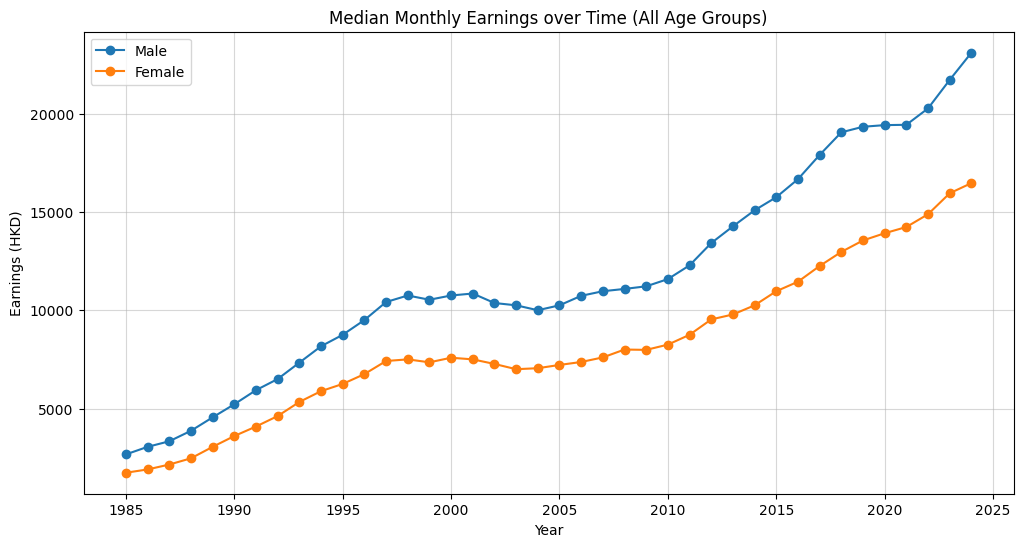

In [44]:
#Overall mean trend by Gender
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
for gender in df_long["Gender"].unique():
    subset = df_long[df_long["Gender"]==gender]
    yearly_mean = subset.groupby("Year")["Earnings"].mean()
    plt.plot(yearly_mean.index, yearly_mean.values, marker="o", label=gender)

plt.title("Median Monthly Earnings over Time (All Age Groups)")
plt.xlabel("Year")
plt.ylabel("Earnings (HKD)")
plt.legend()
plt.grid(True, alpha=0.5)
plt.show()

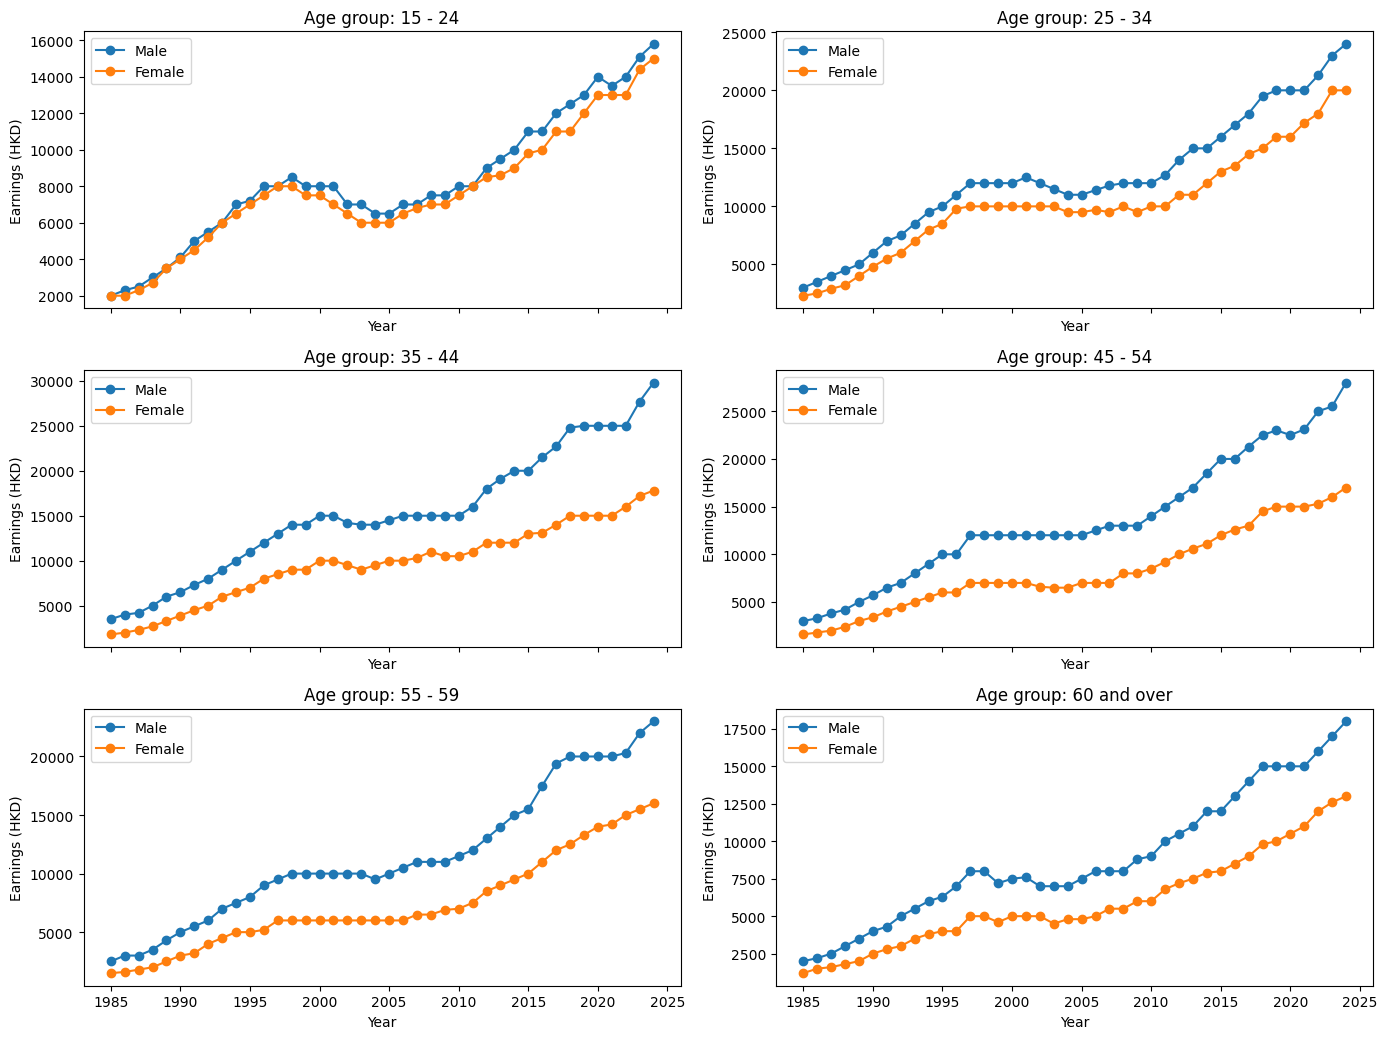

In [45]:
#Trends by Age group × Gender (a single plot per Age group)
# Sorted list of age groups
age_groups = sorted(df_long['Age group'].unique())

n = len(age_groups)
cols = 2
rows = math.ceil(n / cols)
fig, axes = plt.subplots(rows, cols, figsize=(14, 3.5*rows), sharex=True)
axes = axes.flatten()

for ax, age in zip(axes, age_groups):
    has_data = False  # flag to check if any gender has data
    for gender in ['Male', 'Female']:
        sub = df_long[(df_long['Age group'] == age) & (df_long['Gender'] == gender)]
        if not sub.empty:
            yearly_mean = sub.groupby('Year')['Earnings'].mean()
            ax.plot(yearly_mean.index, yearly_mean.values, marker='o', label=gender)
            has_data = True
    ax.set_title(f"Age group: {age}")
    ax.set_xlabel("Year")
    ax.set_ylabel("Earnings (HKD)")
    if has_data:
        ax.legend()
    else:
        ax.text(0.5, 0.5, "No data", ha='center', va='center', fontsize=12, color='red')
        ax.set_xticks([])
        ax.set_yticks([])
# Hide any extra axes if number of subplots > number of age groups
for i in range(len(age_groups), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

In [46]:
# Gender Pay Gap Evolution
df['Pay_Gap'] = df['Male'] - df['Female']
gap_by_age = df.groupby(['Age group', pd.cut(df['Year'], bins=[1984, 2012, 2024], labels=['1985-2012', '2013-2024'])], observed=True)['Pay_Gap'].agg(['mean', 'count']).round(0)
print("\nGender Pay Gap by Age Group and Period (1985-2012 vs 2013-2024):\n", gap_by_age)



Gender Pay Gap by Age Group and Period (1985-2012 vs 2013-2024):
                          mean  count
Age group   Year                    
15 - 24     1985-2012   379.0     28
            2013-2024   967.0     12
25 - 34     1985-2012  1721.0     28
            2013-2024  3550.0     12
35 - 44     1985-2012  3943.0     28
            2013-2024  9208.0     12
45 - 54     1985-2012  4125.0     28
            2013-2024  8275.0     12
55 - 59     1985-2012  3254.0     28
            2013-2024  6225.0     12
60 and over 1985-2012  2250.0     28
            2013-2024  4433.0     12


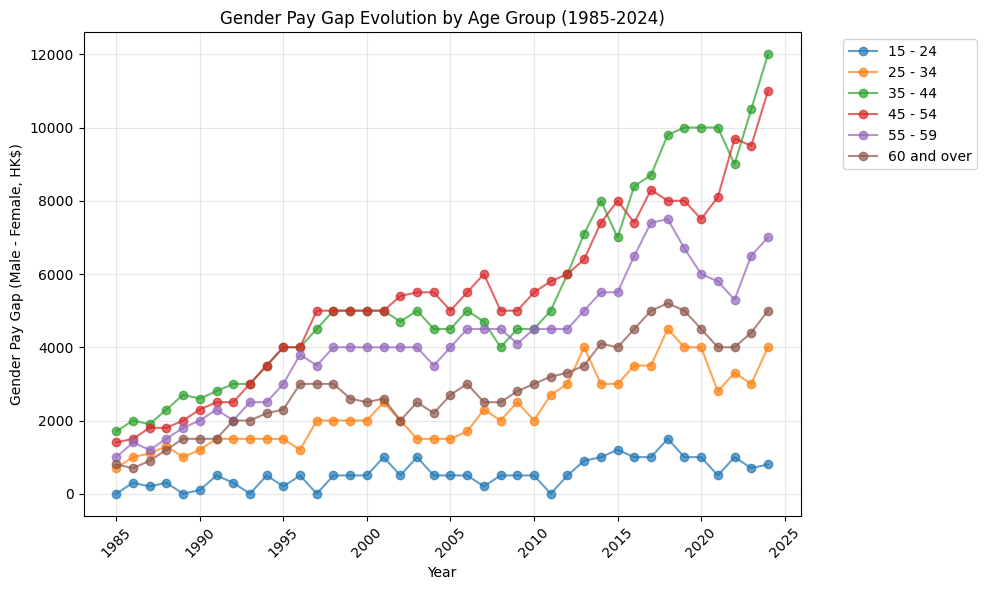

In [47]:
# Overall gap trend
plt.figure(figsize=(10, 6))
for age_group in df['Age group'].unique():
    subset = df[df['Age group'] == age_group]
    plt.plot(subset['Year'], subset['Pay_Gap'], marker='o', label=age_group, alpha=0.7)
plt.xlabel('Year')
plt.ylabel('Gender Pay Gap (Male - Female, HK$)')
plt.title('Gender Pay Gap Evolution by Age Group (1985-2024)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('pay_gap_evolution.png', dpi=300, bbox_inches='tight')
plt.show()

Given the observed trends in median monthly employment earnings across age groups and genders, it is reasonable to investigate whether the earnings gap between males and females is statistically significant. The consistent disparity, with males earning more than females throughout most years, raises the question of whether this difference is due to chance or reflects a systemic pattern. To address this, we will conduct a hypothesis test to evaluate the statistical significance of the observed gender pay gap.

---

We will use Welch’s two-sample t-test to evaluate whether the mean earnings of males and females are significantly different. This test is appropriate because it compares the means of two independent groups (males and females) while accounting for potential differences in variances and group sizes. Unlike a standard t-test, Welch’s t-test does not assume equal variances, making it a more robust choice when analyzing real-world data where such assumptions may not hold.

The formula for the t-score in Welch’s t-test is:

$$ t = \frac{ (\bar{X}_1 - \bar{X}_2) }{ \sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}} } $$

This formula calculates the t-statistic by comparing the difference in sample means to the standard error of the difference, which adjusts for unequal variances and sample sizes. The resulting t-value is then used to compute the p-value, which determines whether the observed difference is statistically significant.

Since we are conducting a two-tailed test, we are testing the hypothesis that the mean earnings of males and females are not equal (μMale​ ≠ μFemale​). We use a significance level (α) of 0.05 to determine whether to reject the null hypothesis. This method provides a rigorous framework for assessing whether the observed gender pay gap is due to chance or reflects a consistent pattern.

# Stating hypotheses:

**Null Hypothesis (H₀):** μMale​ = μFemale​

**Alternative Hypothesis (Hₐ):** μMale​ ≠ μFemale​

### Testing Parameters:
- Test type: Welch’s two-sample t-test, two-tailed  
- Significance level (α): 0.05   
- Decision: Reject H₀ if p < 0.05  

### Results:
- Total years tested: 40
- Years with statistically significant difference (p < 0.05): 35 of 40 years → Reject H₀
- Years without statistically significant difference (p ≥ 0.05): 5 years → Fail to reject H₀: 2000, 2002, 2004, 2005, 2008
- Direction of effect: In every year the male mean > female mean, so the observed gap consistently favors men; for 35 years that gap is statistically significant at the 5% level.


### Type II Error 
- 2000: Δ≈1.54, power ≈ 0.51 (β ≈ 0.49)
- 2002: Δ≈1.54, power ≈ 0.48 (β ≈ 0.52)
- 2004: Δ≈1.49, power ≈ 0.45 (β ≈ 0.55)
- 2005: Δ≈1.45, power ≈ 0.45 (β ≈ 0.55)
- 2008: Δ≈1.45, power ≈ 0.47 (β ≈ 0.53)

Although the observed effect value is large (Glass's Δ ≈ 1.45–1.54), the very small group sizes (n=6 per sex) give only moderate power (~0.45–0.51). Therefore, the probability of a Type-II error is substantial (roughly 49%–55%) in these years; lack of statistical significance in these specific years may reflect limited sample size rather than absence of a real gap.

**Note:** Glass's Δ is reported here as it aligns with Welch's t-test methodology, using the standard deviation of the reference group (females) rather than assuming equal variances.

In [48]:
alpha = 0.05

years = sorted(df_long['Year'].unique())

for year in years:
    print(f"\n=== Year: {year} ===")
    df_year = df_long[df_long['Year'] == year].copy()
    print("Rows:", len(df_year))

    male_earn = df_year[df_year['Gender'] == 'Male']['Earnings'].dropna()
    female_earn = df_year[df_year['Gender'] == 'Female']['Earnings'].dropna()
    print("n_male:", len(male_earn), "n_female:", len(female_earn))

    if len(male_earn) == 0 or len(female_earn) == 0:
        print("Insufficient data for this year. Skipping...")
        continue

    mean_m = male_earn.mean(); sd_m = male_earn.std(ddof=1); n_m = len(male_earn)
    mean_f = female_earn.mean(); sd_f = female_earn.std(ddof=1); n_f = len(female_earn)
    print("Male mean, sd:", mean_m, sd_m)
    print("Female mean, sd:", mean_f, sd_f)

    # Welch's t-test
    t_stat, p_value = stats.ttest_ind(male_earn, female_earn, equal_var=False)

    # Manual calculation of Welch df 
    se = math.sqrt(sd_m**2/n_m + sd_f**2/n_f)
    df_numer = (sd_m**2/n_m + sd_f**2/n_f)**2
    df_denom = (sd_m**4)/((n_m**2)*(n_m-1)) + (sd_f**4)/((n_f**2)*(n_f-1))
    welch_df = df_numer/df_denom

    print(f"Welch t-statistic = {t_stat:.4f}")
    print(f"Welch df ~ {welch_df:.2f}")
    print(f"p-value = {p_value:.6f}")

    # Decision
    if p_value < alpha:
        print("Decision: Reject H0 -> Statistically significant difference in mean earnings.")
    else:
        print("Decision: Fail to reject H0 -> No evidence of difference.")


=== Year: 1985 ===
Rows: 12
n_male: 6 n_female: 6
Male mean, sd: 2666.6666666666665 605.5300708194984
Female mean, sd: 1733.3333333333333 388.15804341359035
Welch t-statistic = 3.1785
Welch df ~ 8.52
p-value = 0.012023
Decision: Reject H0 -> Statistically significant difference in mean earnings.

=== Year: 1986 ===
Rows: 12
n_male: 6 n_female: 6
Male mean, sd: 3050.0 700.713921654194
Female mean, sd: 1900.0 357.77087639996637
Welch t-statistic = 3.5804
Welch df ~ 7.44
p-value = 0.008101
Decision: Reject H0 -> Statistically significant difference in mean earnings.

=== Year: 1987 ===
Rows: 12
n_male: 6 n_female: 6
Male mean, sd: 3333.3333333333335 763.3260552782583
Female mean, sd: 2150.0 459.34736311423404
Welch t-statistic = 3.2536
Welch df ~ 8.20
p-value = 0.011253
Decision: Reject H0 -> Statistically significant difference in mean earnings.

=== Year: 1988 ===
Rows: 12
n_male: 6 n_female: 6
Male mean, sd: 3866.6666666666665 828.6535263104035
Female mean, sd: 2466.6666666666665 512.

In [49]:
results = []

alpha = 0.05
years = sorted(df_long['Year'].unique())

for year in years:
    df_year = df_long[df_long['Year'] == year].copy()
    male_earn = df_year[df_year['Gender'] == 'Male']['Earnings'].dropna()
    female_earn = df_year[df_year['Gender'] == 'Female']['Earnings'].dropna()
    if len(male_earn) == 0 or len(female_earn) == 0:
        continue

    mean_m = male_earn.mean(); sd_m = male_earn.std(ddof=1); n_m = len(male_earn)
    mean_f = female_earn.mean(); sd_f = female_earn.std(ddof=1); n_f = len(female_earn)

    t_stat, p_value = stats.ttest_ind(male_earn, female_earn, equal_var=False)
    diff = mean_m - mean_f
    se = math.sqrt(sd_m**2/n_m + sd_f**2/n_f)
    df_numer = (sd_m**2/n_m + sd_f**2/n_f)**2
    df_denom = (sd_m**4)/((n_m**2)*(n_m-1)) + (sd_f**4)/((n_f**2)*(n_f-1))
    welch_df = df_numer / df_denom

    reject = p_value < alpha
    results.append({
        'Year': year,
        'Mean_Male': mean_m,
        'Mean_Female': mean_f,
        'Diff': diff,
        't_stat': t_stat,
        'p_value': p_value,
        'Reject_H0': reject,
        'n_male': n_m,
        'n_female': n_f,
        'sd_male': sd_m,
        'sd_female': sd_f,
        'se': se,
        'df': welch_df
    })

results_df = pd.DataFrame(results)
display(results_df.head())

,Year,Mean_Male,Mean_Female,Diff,t_stat,p_value,Reject_H0,n_male,n_female,sd_male,sd_female,se,df
0,1985,2666.666667,1733.333333,933.333333,3.178536,0.012023,True,6,6,605.530071,388.158043,293.636207,8.515510
1,1986,3050.000000,1900.000000,1150.000000,3.580372,0.008101,True,6,6,700.713922,357.770876,321.195683,7.441031
2,1987,3333.333333,2150.000000,1183.333333,3.253596,0.011253,True,6,6,763.326055,459.347363,363.700121,8.201453
3,1988,3866.666667,2466.666667,1400.000000,3.519608,0.007352,True,6,6,828.653526,512.510163,397.771570,8.336962
4,1989,4550.000000,3050.000000,1500.000000,3.030458,0.013927,True,6,6,977.241014,717.635005,494.974747,9.177745


In this case, the persistent rejection of the null hypothesis (H0​: no difference in means) across all the years indicates that the gender pay gap is statistically significant every year. This means there is consistent evidence that the average earnings of males and females differ, and this difference is not due to random chance. Additionally, it also suggests that the pay gap is a systematic issue, likely influenced by structural inequalities or other factors that disadvantage one group. This result underscores the importance of addressing the underlying causes of the disparity, as the consistent significance of the gap demonstrates that it is not a temporary or isolated phenomenon but an ongoing trend over time.

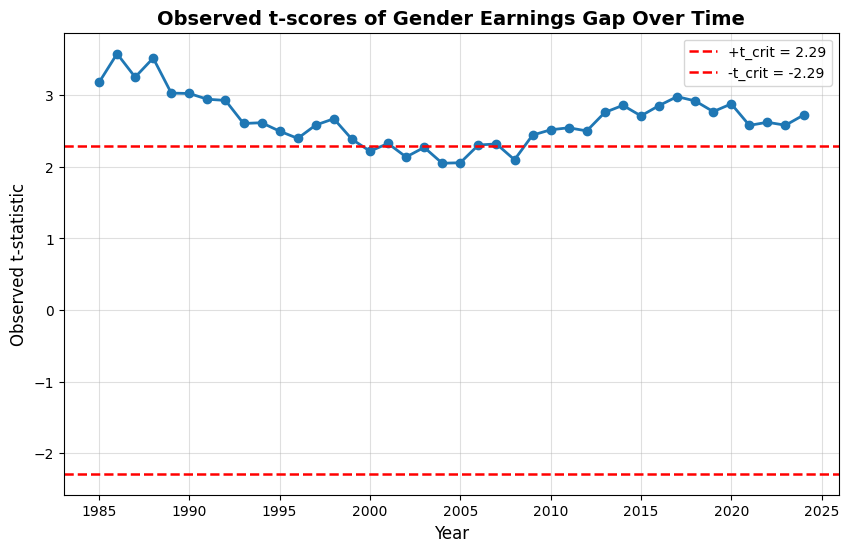

In [50]:
# Plot of observed t-scores across all years
plt.figure(figsize=(10,6))
plt.plot(results_df['Year'], results_df['t_stat'], marker='o', linestyle='-', linewidth=2, markersize=6)

df_avg = results_df['df'].mean() 
t_crit_line = stats.t.ppf(1 - 0.05/2, df_avg)
plt.axhline(y=t_crit_line, color='red', linestyle='--', linewidth=1.8, label=f'+t_crit = {t_crit_line:.2f}')
plt.axhline(y=-t_crit_line, color='red', linestyle='--', linewidth=1.8, label=f'-t_crit = {-t_crit_line:.2f}')

plt.title("Observed t-scores of Gender Earnings Gap Over Time", fontsize=14, fontweight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Observed t-statistic", fontsize=12)
plt.grid(alpha=0.4)
plt.legend()
plt.show()

The plot visualizes the observed t-scores of the gender earnings gap over time, with critical t-score thresholds represented by red dashed lines. The t-scores for all years lie outside the critical thresholds, confirming that the differences in male and female earnings are statistically significant across the entire timeframe. This consistent pattern reflects a persistent and systematic gender pay gap that cannot be due to random variability.

The critical values are calculated based on the average degrees of freedom across all years, defining the boundaris for statistical significance at α=0.05. Observed t-scores above the positive threshold or below the negative threshold indicate strong evidence to reject the null hypothesis (H0​: no difference in means). This reinforces the earlier conclusion that the gender pay gap is significant every year and highlights its consistency over time.

In [51]:
fail_cases = results_df[results_df['Reject_H0'] == False].copy()
fail_cases['AbsDiff'] = fail_cases['Diff'].abs()

# Year with the largest absolute non-significant difference
largest_fail = fail_cases.loc[fail_cases['AbsDiff'].idxmax()]
print("Largest absolute difference where H₀ was not rejected:")
display(largest_fail)

Largest absolute difference where H₀ was not rejected:


Year                  2000
Mean_Male          10750.0
Mean_Female    7583.333333
Diff           3166.666667
t_stat            2.219226
p_value           0.053172
Reject_H0            False
n_male                   6
n_female                 6
sd_male        2824.004249
sd_female      2059.530691
se             1426.923653
df                 9.14589
AbsDiff        3166.666667
Name: 15, dtype: object

The output highlights a specific year where the observed gender pay gap (in absolute terms) was large but not statistically significant. This means that, despite a considerable difference in earnings, the variability in the data or smaller sample sizes made it impossible to conclude with confidence that the gap was not due to chance. This could point to background noise or limited data for that year, rather than an absence of a true pay gap.

In [52]:
from scipy.stats import nct, t

beta_results = []

for _, row in fail_cases.iterrows():
    df_ = row['df']
    se = row['se']
    delta = row['Diff']
    ncp = delta / se  
    t_crit = t.ppf(1 - alpha/2, df_)

    # Type II error = P(-t_crit < T < t_crit | δ = true effect)
    beta = nct.cdf(t_crit, df_, ncp) - nct.cdf(-t_crit, df_, ncp)
    power = 1 - beta
    glass_delta = delta / row['sd_female']
    
    beta_results.append({'Year': row['Year'], 'TypeII_Error': beta, 'Power': power, 'Glass_Delta': glass_delta, 'Observed_Diff': delta})

beta_df = pd.DataFrame(beta_results)
display(beta_df)

,Year,TypeII_Error,Power,Glass_Delta,Observed_Diff
0,2000,0.490085,0.509915,1.537567,3166.666667
1,2002,0.521639,0.478361,1.541037,3100.000000
2,2004,0.552872,0.447128,1.490926,2950.000000
3,2005,0.548332,0.451668,1.452426,3033.333333
4,2008,0.532390,0.467610,1.453497,3083.333333


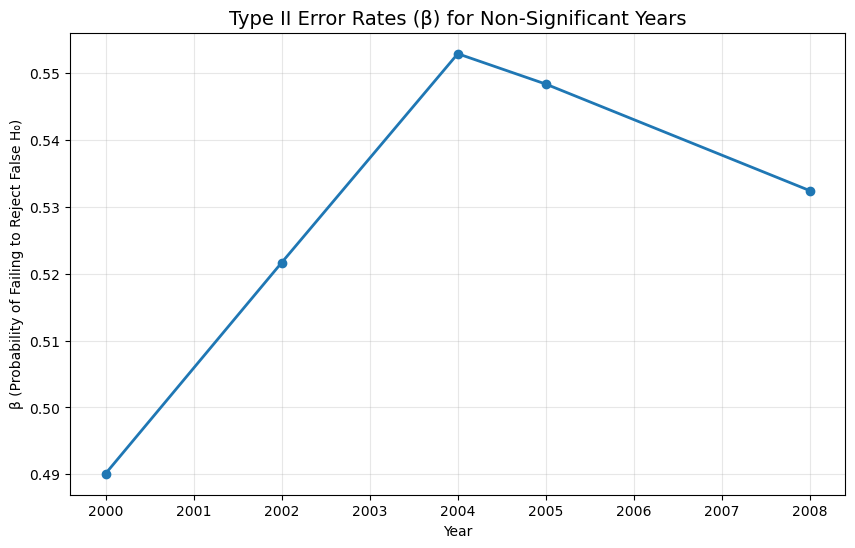

In [53]:
plt.figure(figsize=(10,6))
plt.plot(beta_df['Year'], beta_df['TypeII_Error'], marker='o', linewidth=2)
plt.title("Type II Error Rates (β) for Non-Significant Years", fontsize=14)
plt.xlabel("Year")
plt.ylabel("β (Probability of Failing to Reject False H₀)")
plt.grid(True, alpha=0.3)
plt.show()

High Type II error rates indicate limited power in detecting significant differences, which could result from small sample sizes or high variability in the data for those years. This highlights the importance of improving data quality and sample sizes to reduce Type II errors and ensure more reliable detection of pay disparities. The trend in β values over time provides insights into how statistical power fluctuates with the dataset's characteristics.

# Regression Analysis
OLS of monthly earnings on **Year**(1985 - 2024),**Male**(1=male), **Year×Male**, and age-group dummies. Estimates: **Year = +321.52** (p<0.001), **Male = −248,169.94** (p<0.001, not directly interpretable), **Year×Male = +125.53** (p<0.001).

Female earnings (reference group) rise ≈ **HKD 321.5/year**; male earnings rise ≈ **HKD 447.1/year** (321.5 + 125.5), so the gender gap widens by ≈ **HKD 125.5** each year. The male intercept is the gap at Year=0 (outside the sample) and should not be interpreted alone—use β2​+β3⋅t to report the gap at specific years (≈ HKD 1,013 in 1985 and 5,909 in 2024).

In [54]:
#5) OLS Regression

In [55]:
import numpy as np
import pandas as pd
from scipy import stats

df_reg = df_long.copy()

df_reg = df_reg.dropna(subset=['Earnings', 'Year', 'Gender', 'Age group']).copy()

df_reg['Male_dummy'] = (df_reg['Gender'] == 'Male').astype(float)

age_dummies = pd.get_dummies(df_reg['Age group'], prefix='Age', drop_first=True).astype(float)

X_base = pd.concat([df_reg[['Year','Male_dummy']].astype(float), age_dummies], axis=1)

X_base['Year_Male'] = X_base['Year'] * X_base['Male_dummy']

X = np.column_stack([np.ones(len(X_base)), X_base.values.astype(float)])
y = df_reg['Earnings'].values.reshape(-1,1).astype(float)

col_names = ['Intercept'] + list(X_base.columns)

XtX = X.T.dot(X)
XtX_inv = np.linalg.inv(XtX)
Xty = X.T.dot(y)
beta = XtX_inv.dot(Xty)  # k x 1

y_hat = X.dot(beta)
resid = y - y_hat
n, k = X.shape
df_resid = n - k
sse = float((resid**2).sum())
sigma2_hat = sse / df_resid

vcov = sigma2_hat * XtX_inv
se_beta = np.sqrt(np.diag(vcov)).reshape(-1,1)

t_stats = (beta / se_beta).reshape(-1)
p_values = 2 * stats.t.sf(np.abs(t_stats), df_resid)

results = pd.DataFrame({
    'coef': beta.flatten(),
    'std_err': se_beta.flatten(),
    't': t_stats,
    'p_value': p_values
}, index=col_names)

print(f"OLS results (n={n}, k={k}, df_resid={df_resid}):\n")
display(results.round(20))

# R-squared
r_squared = 1 - sse / ((y - y.mean())**2).sum()
print(f"\nR-squared: {r_squared:.4f}")

OLS results (n=480, k=9, df_resid=471):



,coef,std_err,t,p_value
Intercept,-638278.765249,20619.645101,-30.954886,0.000000e+00
Year,321.524390,10.286081,31.258203,0.000000e+00
Male_dummy,-248169.940583,29159.373050,-8.510812,2.324800e-16
Age_25 - 34,3422.500000,290.843362,11.767503,0.000000e+00
Age_35 - 44,4511.250000,290.843362,15.510926,0.000000e+00
Age_45 - 54,3027.500000,290.843362,10.409383,0.000000e+00
Age_55 - 59,1480.000000,290.843362,5.088650,5.219426e-07
Age_60 and over,-565.000000,290.843362,-1.942626,5.265692e-02
Year_Male,125.533146,14.546715,8.629656,9.521000e-17



R-squared: 0.8889


In [56]:
#6) Inferential tests for key coefficients

In [57]:
for name in ['Year','Male_dummy','Year_Male']:
    idx = col_names.index(name)
    coef = results.loc[name,'coef']
    tstat = results.loc[name,'t']
    p = results.loc[name,'p_value']
    print(f"{name}: coef={coef:.4f}, t={tstat:.3f}, p={p:.4e}")
    if p < alpha:
        print(f"  -> Reject H0: {name} is statistically significant at α={alpha}\n")
    else:
        print(f"  -> Fail to reject H0: {name} not significant at α={alpha}\n")

Year: coef=321.5244, t=31.258, p=6.0298e-117
  -> Reject H0: Year is statistically significant at α=0.05

Male_dummy: coef=-248169.9406, t=-8.511, p=2.3248e-16
  -> Reject H0: Male_dummy is statistically significant at α=0.05

Year_Male: coef=125.5331, t=8.630, p=9.5207e-17
  -> Reject H0: Year_Male is statistically significant at α=0.05



## Time-Series Trend Analysis

### Compound Annual Growth Rates (CAGR) 

**Highest Growth Groups:**
- **Females aged 60+**: 6.30% CAGR
- **Females aged 55-59**: 6.26% CAGR  
- **Females aged 45-54**: 6.25% CAGR

**Observations:**
- **Female workers** generally experienced **higher percentage growth** than males
- However, higher percentage growth on lower base earnings may not close absolute gaps
- **Younger cohorts** show lower CAGRs, potentially indicating generational shifts
- The **35-44 male group** shows the highest absolute earnings but moderate growth rate

### Linear Trend Analysis
All demographic groups show statistically significant positive slopes (p < 0.001), confirming the overall upward trajectory observed in visualizations. The consistency across groups shows that extensive economic growth benefits all categories of workers.

In [58]:
#7) Time-Series / Trend Analysis by Age group × Gender

In [59]:
from scipy.stats import linregress

groups = []
for (age, gender), grp in df_long.groupby(['Age group','Gender']):
    yearly = grp.groupby('Year')['Earnings'].mean().reset_index()
    if len(yearly) < 2:
        continue
    slope, intercept, r_value, pval, stderr = linregress(yearly['Year'], yearly['Earnings'])
    start_year = yearly['Year'].min()
    end_year = yearly['Year'].max()
    first = float(yearly.loc[yearly['Year']==start_year,'Earnings'].mean())
    last = float(yearly.loc[yearly['Year']==end_year,'Earnings'].mean())
    years = end_year - start_year
    if first > 0 and years > 0:
        cagr = (last/first)**(1/years) - 1
    else:
        cagr = np.nan
    groups.append({
        'Age group': age,
        'Gender': gender,
        'slope_per_year': slope,
        'slope_stderr': stderr,
        'slope_pval': pval,
        'r_sq': r_value**2,
        'start_year': start_year,
        'end_year': end_year,
        'first_mean': first,
        'last_mean': last,
        'CAGR': cagr
    })

trend_df = pd.DataFrame(groups).sort_values(['Age group','Gender'])
display(trend_df.round(6))

,Age group,Gender,slope_per_year,slope_stderr,slope_pval,r_sq,start_year,end_year,first_mean,last_mean,CAGR
0,15 - 24,Female,258.086304,18.125398,0.0,0.842158,1985,2024,2000.0,15000.0,0.053022
1,15 - 24,Male,280.262664,18.411627,0.0,0.859108,1985,2024,2000.0,15800.0,0.054426
2,25 - 34,Female,360.469043,21.476761,0.0,0.881141,1985,2024,2300.0,20000.0,0.057024
3,25 - 34,Male,436.941839,22.395446,0.0,0.909232,1985,2024,3000.0,24000.0,0.054766
4,35 - 44,Female,360.384615,12.199779,0.0,0.958271,1985,2024,1800.0,17800.0,0.060514
5,35 - 44,Male,578.311445,21.829614,0.0,0.948637,1985,2024,3500.0,29800.0,0.056452
6,45 - 54,Female,357.242026,15.241620,0.0,0.935305,1985,2024,1600.0,17000.0,0.062469
7,45 - 54,Male,555.984991,21.059860,0.0,0.948297,1985,2024,3000.0,28000.0,0.058943
8,55 - 59,Female,331.838649,16.915846,0.0,0.910129,1985,2024,1500.0,16000.0,0.062575
9,55 - 59,Male,473.377111,19.881923,0.0,0.937179,1985,2024,2500.0,23000.0,0.058553


In [60]:
#Plot: slopes (trend) for each age group (male vs female)

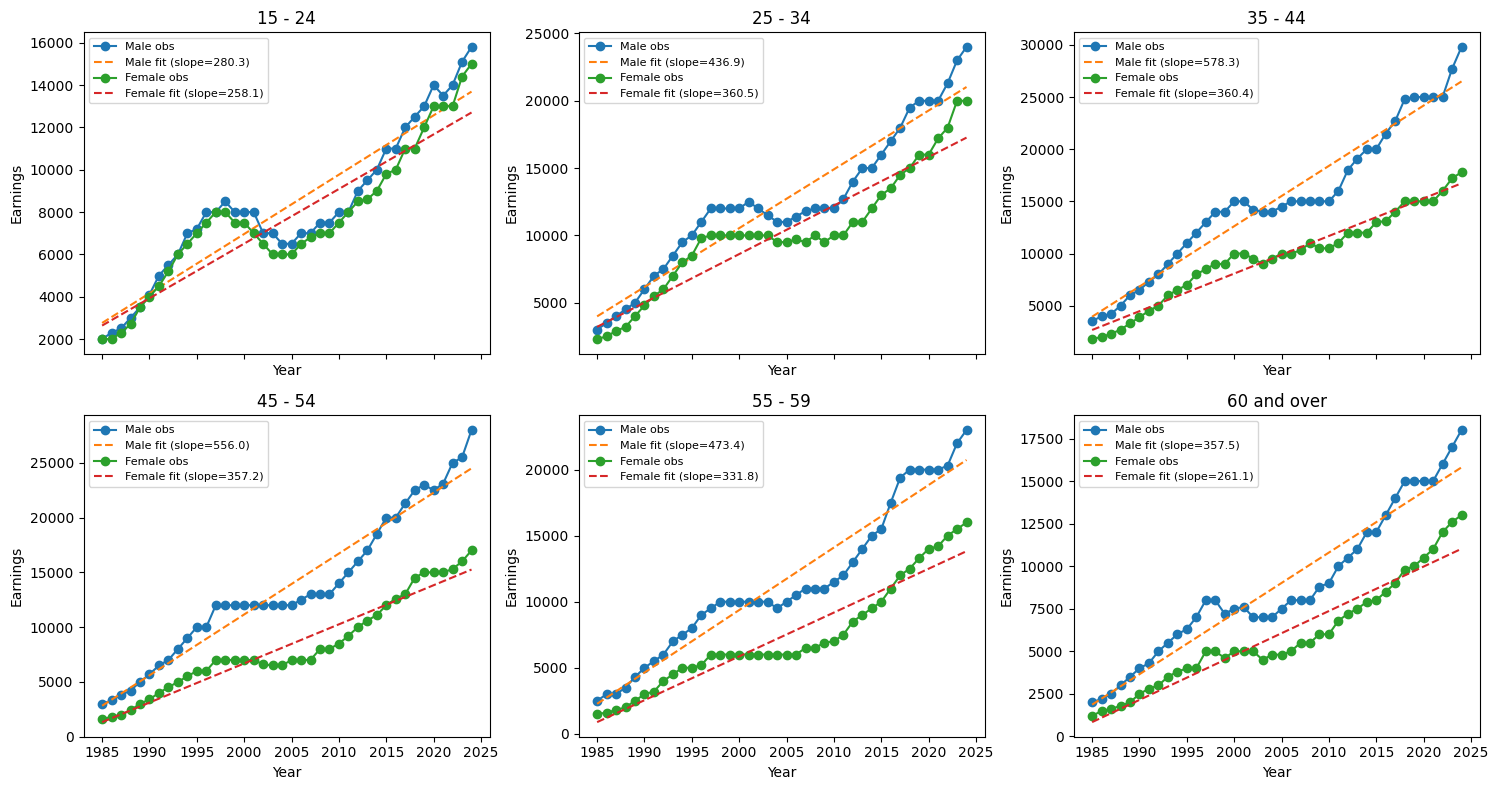

In [61]:
age_groups = sorted(df_long['Age group'].unique())
fig, axes = plt.subplots(math.ceil(len(age_groups)/3), 3, figsize=(15, 4*math.ceil(len(age_groups)/3)), sharex=True)
axes = axes.flatten()

for ax, age in zip(axes, age_groups):
    for gender in ['Male','Female']:
        grp = df_long[(df_long['Age group']==age) & (df_long['Gender']==gender)]
        if grp.empty:
            continue
        yearly = grp.groupby('Year')['Earnings'].mean().reset_index()
        ax.plot(yearly['Year'], yearly['Earnings'], marker='o', label=f"{gender} obs")
        # overlay linear fit
        if len(yearly) >= 2:
            m, b, r, p, se = linregress(yearly['Year'], yearly['Earnings'])
            ax.plot(yearly['Year'], b + m*yearly['Year'], linestyle='--', label=f"{gender} fit (slope={m:.1f})")
    ax.set_title(age)
    ax.set_xlabel("Year")
    ax.set_ylabel("Earnings")
    ax.legend(fontsize=8)
plt.tight_layout()
plt.show()

In [62]:
#8) Conclusion

# Summary of Findings

* **Overall Earnings Growth:**
  Median monthly earnings in Hong Kong have increased steadily from **1985 to 2024**, reflecting sustained economic expansion.

* **Age-Based Differences:**
  **Older workers** experienced stronger wage growth than **younger cohorts**, likely due to accumulated experience and shifts toward high-skilled industries.

* **Gender Pay Gap:**
  The **gender earnings gap** has remained **persistent** — and in some cases **widened** — indicating that income equality between men and women has not significantly improved.

* **Economic Implications:**
  These patterns suggest that **economic progress** has not translated into **inclusive wage growth**, particularly across **age** and **gender** lines.

* **Policy Insight:**
  Addressing **intergenerational inequality** and **gender disparities** should be key priorities for ensuring fairer labor market outcomes in Hong Kong.

# Key Takeaways:

* Earnings in Hong Kong grew significantly, but inequality persists.

* Younger workers and women remain at a relative disadvantage.

* Promoting inclusive and equitable growth is essential for long-term labor market stability.


# References:

**https://www.censtatd.gov.hk/en/web_table.html?id=210-06314&full_series=1&download_excel=1**

**https://ideas.repec.org/a/aea/jeclit/v55y2017i3p789-865.html**

**https://ideas.repec.org/a/zbw/econso/246859.html**
